In [1]:
import pandas as pd
import graphviz
from code_data_science import data_table as dt

df = dt.read_csv('../samples/cobol_find_copybook.csv')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


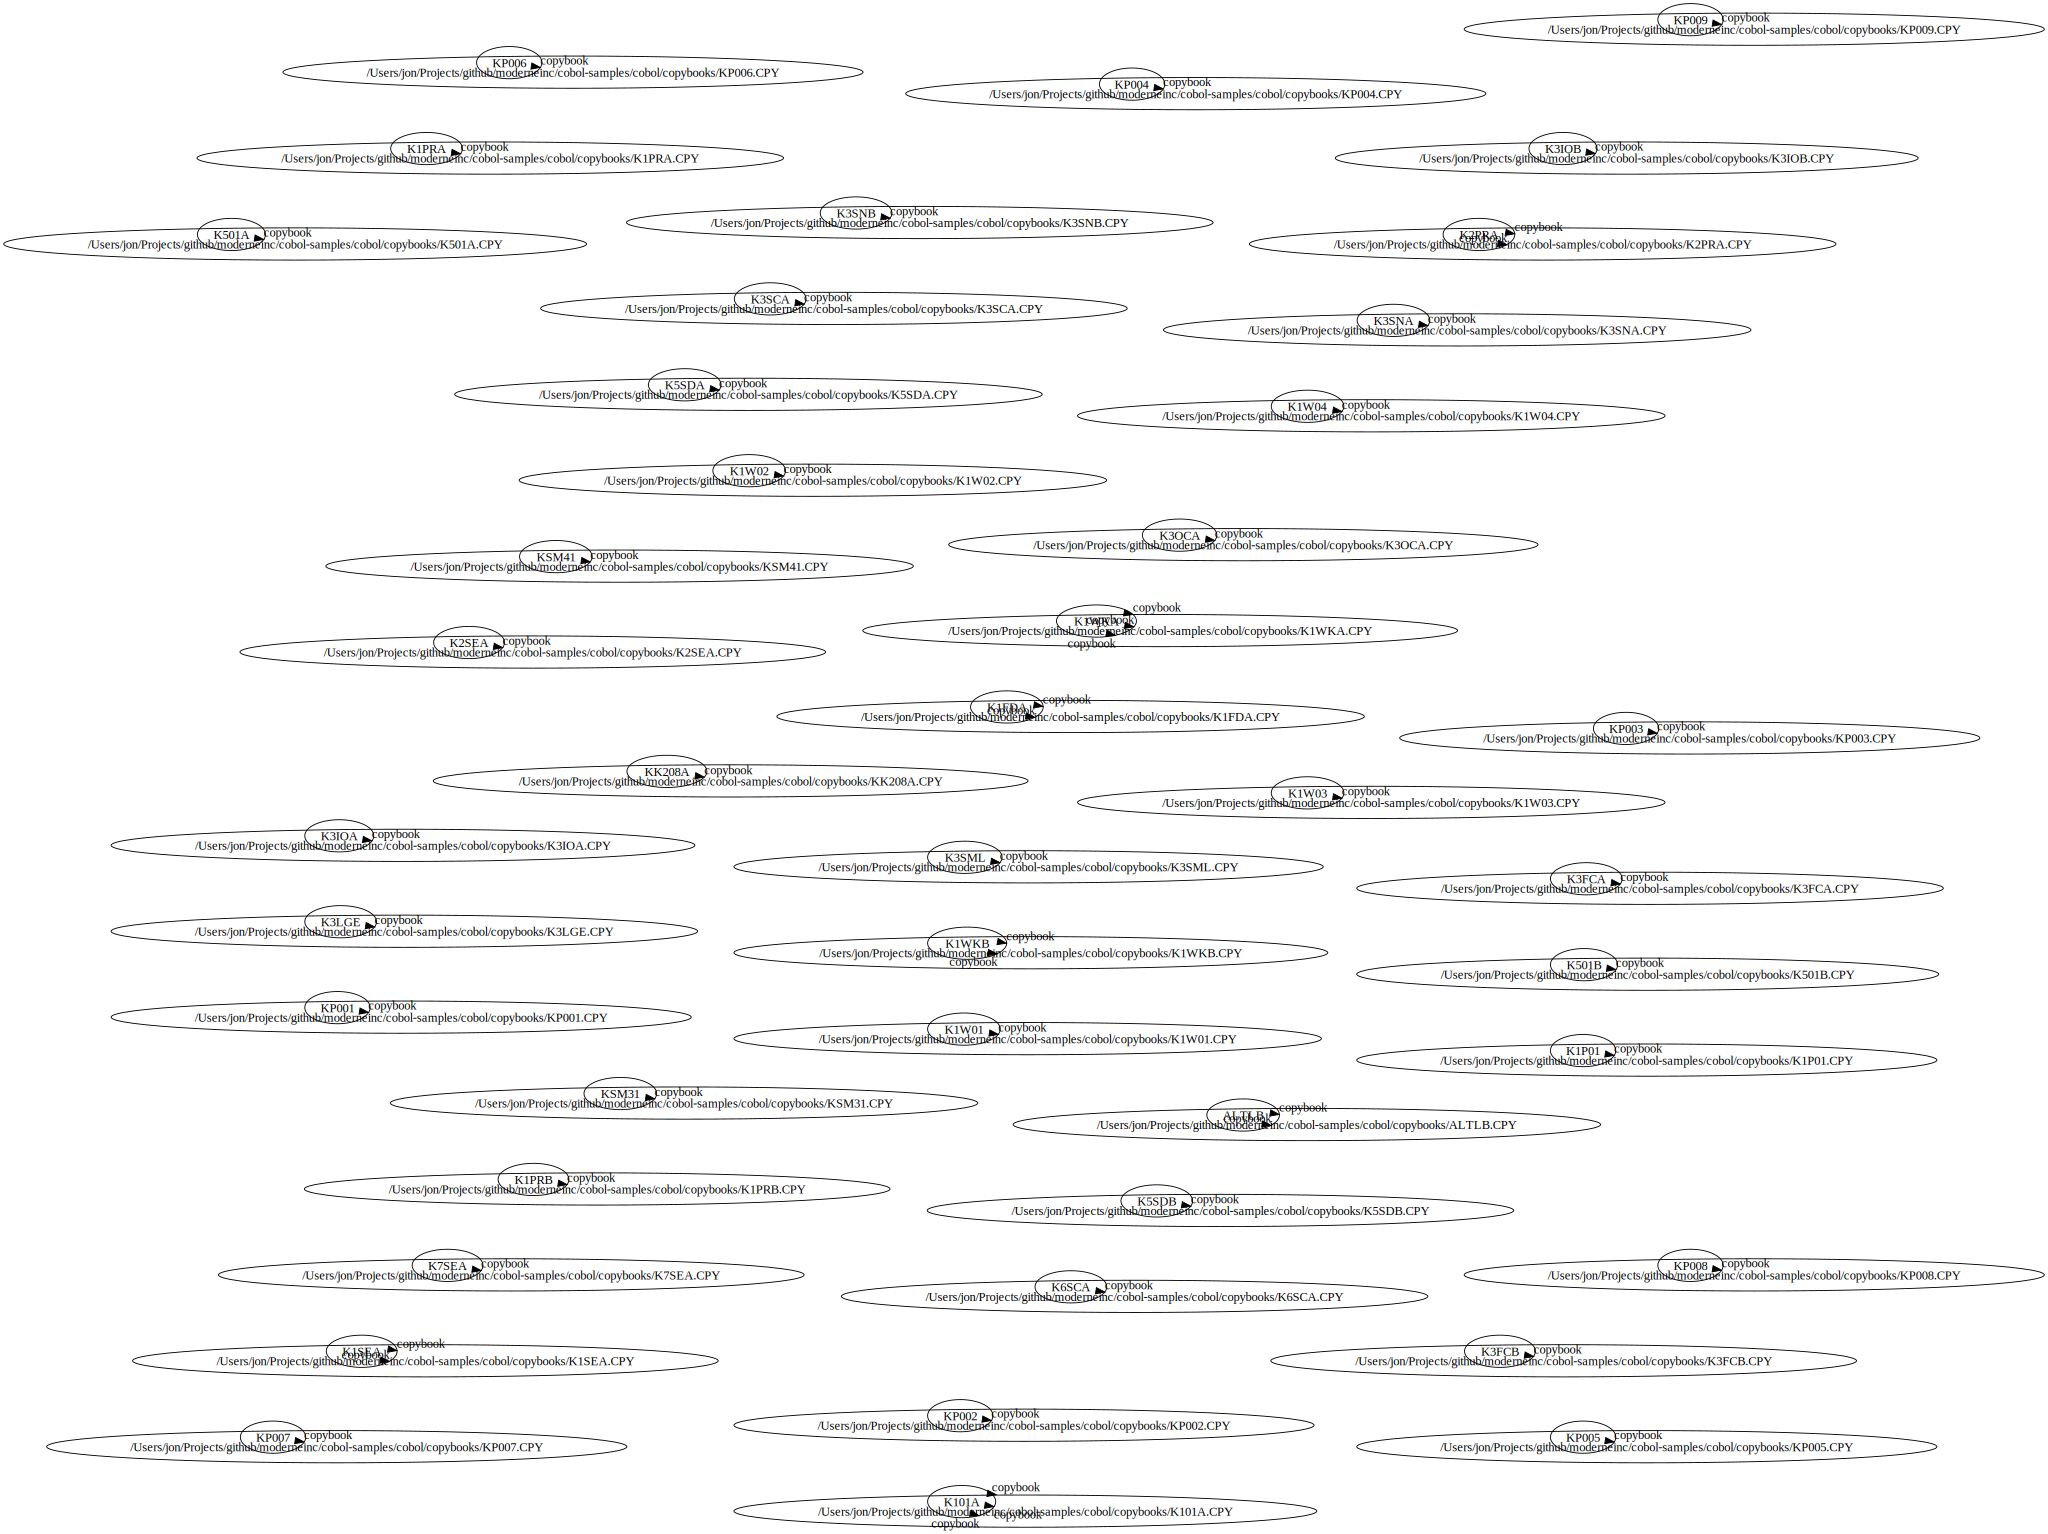

In [12]:
graphviz.set_jupyter_format('svg')
graphviz.set_default_engine('sfdp')
dot = graphviz.Digraph('copybook-usage', comment='Usage of COBOL copybooks')

def styleNode(value):
    if value == 'MISSING_SOURCE': 
        return 'red'
    return 'white'

def describeNode(value):
    if value == 'MISSING_SOURCE':
        return 'missing copybook'
    return 'copybook'

def mapCopybookToSource(row):
    dot.node(row['copybookName'], style='filled', fillcolor=styleNode(row['resolutionStatus']))
    dot.node(row['copybookSourcePath'])
    dot.edge(row['copybookName'], row['copybookSourcePath'], describeNode((row['resolutionStatus'])))

df.apply(mapCopybookToSource, axis=1)

dot